# Análise de Dados - League of Legends Dataset

Esse é a analise do dataset sobre as partidas do jogo league of legends, onde vamos explorar a média de vitória, vitória por time e analise de objetivos do jogo.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style='whitegrid')

## 1. Importando os Dados

Vamos importar os dados do arquivo games.csv que se encontra na pasta Dataset, assim carregando nosso dataset com as partidas analisadas

In [124]:

df = pd.read_csv("Dataset\games.csv")


df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


## 2. Demonstração dos Ddos
Vamos verificar o que o dataset tem a nos oferecer, assim mostrando algumas colunas, valores e estatísticas básicas.

In [125]:
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


## 3. Alterando valores ausentes
Vamos tratar os valores ausentes do dataset

In [126]:
df = df.fillna(df.mean(numeric_only=True))

## 4. Normalizando os dados numéricos
Vamos padronizar os tipos de dados, assim colocando uma padronização nessas colunas selecionadas

In [127]:
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,0.674230,0.684444,0.227801,0.0,-0.987186,1.016113,-0.830132,-0.456281,0.087341,-0.777432,...,-0.142314,-0.784133,-0.675419,-0.330238,1.779002,0.056398,-0.397690,-0.640314,-0.896272,-0.555365
1,-2.602018,-2.566634,0.036400,0.0,-0.987186,-0.905779,-0.830132,-0.456281,-1.101132,-0.777432,...,-0.919324,-0.784133,-0.675419,-1.146911,-0.562113,-0.947982,-0.397690,1.260434,-0.557603,3.035696
2,0.717576,0.725215,-0.662802,0.0,-0.987186,1.016113,-0.830132,-0.456281,0.087341,0.978269,...,-0.919324,-0.784133,-0.675419,-0.330238,-0.562113,0.475703,1.264607,0.119985,-0.499546,-0.779198
3,0.700369,0.719351,-0.145236,0.0,-0.987186,-0.905779,-0.830132,-0.456281,0.087341,-0.777432,...,-1.437331,-0.784133,-0.675419,-1.146911,-0.562113,0.543962,-0.874020,0.314934,-0.664042,-0.555365
4,0.809809,0.823449,0.510997,0.0,-0.987186,1.016113,-0.830132,-0.456281,0.087341,-0.777432,...,-0.660321,-0.784133,-0.675419,-0.330238,-0.562113,-0.216637,-0.942068,0.899780,0.129410,-0.876516


## 5. Gráfico de Duração de Partidas
Aqui analisamos uma média da duração de partidas, asim analizando a frequencia e a duração

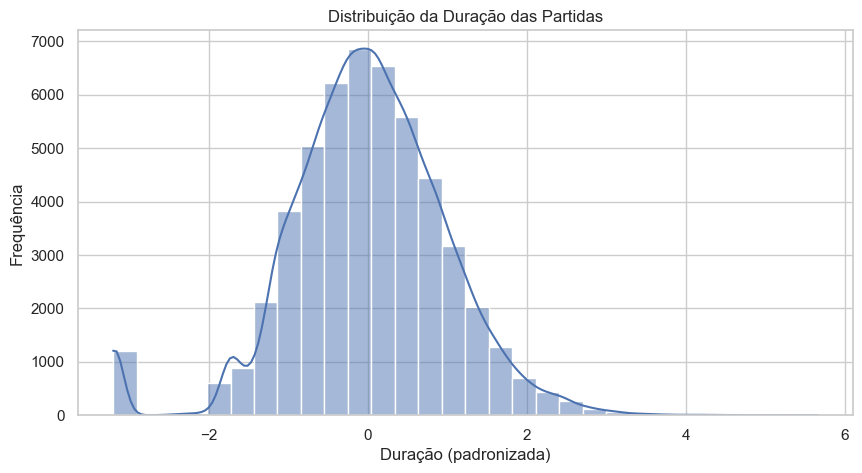

In [128]:
plt.figure(figsize=(10, 5))
sns.histplot(df['gameDuration'], bins=30, kde=True)
plt.title("Distribuição da Duração das Partidas")
plt.xlabel("Duração (padronizada)")
plt.ylabel("Frequência")
plt.show()

## 6. Gráfico de Vitória por Time
Aqui juntamos as vitórias do time 1 dado como o time azul e o time 2 dado como vermelho, assim demonstrando que o time azul tem mais chance de vitória do que o vermelho

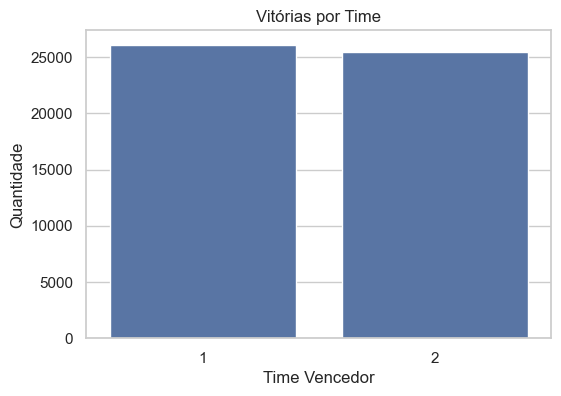

In [129]:
original = pd.read_csv("Dataset\games.csv")
plt.figure(figsize=(6, 4))
sns.countplot(x='winner', data=original)
plt.title("Vitórias por Time")
plt.xlabel("Time Vencedor")
plt.ylabel("Quantidade")
plt.show()

## 7. Gráfico de Objetivo
No jogo, temos os objetivo, que dão fortalecimento ao time que realizar eles, nesse gráfico vemos a média de objetivo para o time vencedor

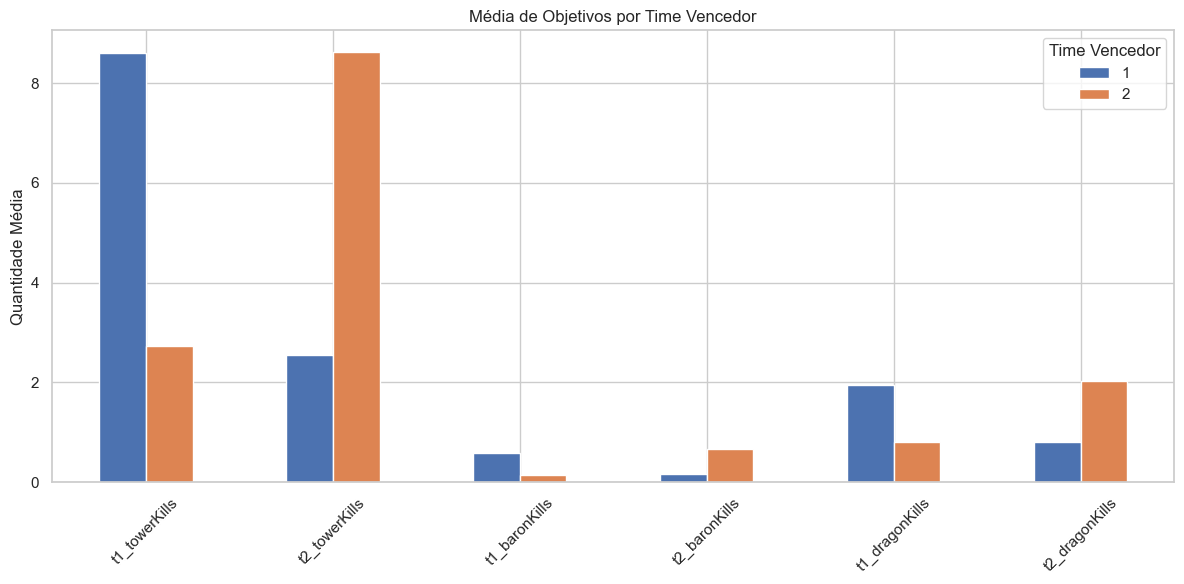

In [130]:
objetivos = original.groupby('winner')[['t1_towerKills', 't2_towerKills',
                                        't1_baronKills', 't2_baronKills',
                                        't1_dragonKills', 't2_dragonKills']].mean()

objetivos.T.plot(kind='bar', figsize=(12, 6))
plt.title("Média de Objetivos por Time Vencedor")
plt.ylabel("Quantidade Média")
plt.xticks(rotation=45)
plt.legend(title='Time Vencedor')
plt.tight_layout()
plt.show()

## 8. Mapa de Correlação

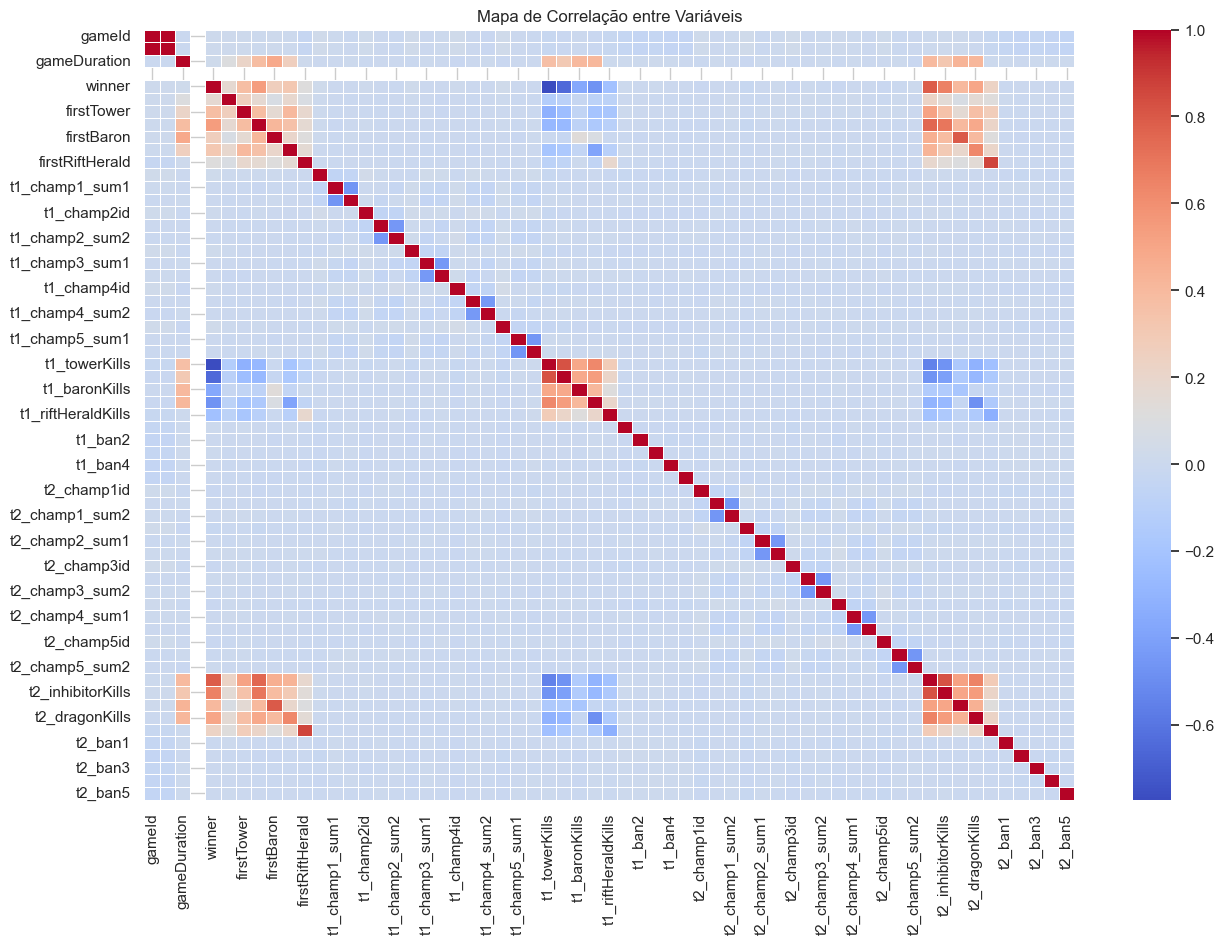

In [131]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


## 9. Relatorio detalhado 

In [132]:
print("Tamanho do dataset:", df.shape)
print("Colunas:", df.columns.tolist())
print("Correlação:")
print(df.corr())


Tamanho do dataset: (51490, 61)
Colunas: ['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', '